<a href="https://colab.research.google.com/github/miatsivitse/Harmful-Brain-Activity-Classification/blob/main/HBA_DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HMS - Harmful Brain Activity Classification

Kaggle Competition: https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/overview

The goal of this competition is to detect and classify seizures and other types of harmful brain activity. You will develop a model trained on electroencephalography (EEG) signals recorded from critically ill hospital patients.

Your work may help rapidly improve electroencephalography pattern classification accuracy, unlocking transformative benefits for neurocritical care, epilepsy, and drug development. Advancement in this area may allow doctors and brain researchers to detect seizures or other brain damage to provide faster and more accurate treatments.

## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Load files
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

<ipython-input-12-a4fa6c5e3bde>:2: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/content/train.csv')


In [3]:
train_data

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1.628181e+09,0,0.0,3.537330e+05,0,0.0,127492639,42516,Seizure,3,0,0.0,0.0,0.0,0.0
1,1.628181e+09,1,6.0,3.537330e+05,1,6.0,3887563113,42516,Seizure,3,0,0.0,0.0,0.0,0.0
2,1.628181e+09,2,8.0,3.537330e+05,2,8.0,1142670488,42516,Seizure,3,0,0.0,0.0,0.0,0.0
3,1.628181e+09,3,18.0,3.537330e+05,3,18.0,2718991173,42516,Seizure,3,0,0.0,0.0,0.0,0.0
4,1.628181e+09,4,24.0,3.537330e+05,4,24.0,3080632009,42516,Seizure,3,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124367,3.519173e+08,6,12.0,2.147388e+09,6,12.0,4195677307,10351,LRDA,0,0,0.0,3.0,0.0,0.0
124368,3.519173e+08,7,14.0,2.147388e+09,7,14.0,290896675,10351,LRDA,0,0,0.0,3.0,0.0,0.0
124369,3.519173e+08,8,16.0,2.147388e+09,8,16.0,461435451,10351,LRDA,0,0,0.0,3.0,0.0,0.0
124370,3.519173e+08,9,18.0,2.147388e+09,9,18.0,3786213131,10351,LRDA,0,0,0.0,3.0,0.0,0.0


In [4]:
test_data

,spectrogram_id,eeg_id,patient_id
0,853520,3911565283,6885


In [11]:
#EDA
print("Train dataset statistics:")
print(train_data.info())
print(train_data.describe())

print("\nTest dataset statistics:")
print(test_data.info())
print(test_data.describe())

Train dataset statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124372 entries, 0 to 124371
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            124371 non-null  float64
 1   eeg_sub_id                        124372 non-null  int64  
 2   eeg_label_offset_seconds          124372 non-null  float64
 3   spectrogram_id                    124372 non-null  float64
 4   spectrogram_sub_id                124372 non-null  object 
 5   spectrogram_label_offset_seconds  124372 non-null  float64
 6   label_id                          124372 non-null  object 
 7   patient_id                        124372 non-null  int64  
 8   expert_consensus                  124372 non-null  object 
 9   seizure_vote                      124372 non-null  int64  
 10  lpd_vote                          124372 non-null  int64  
 11  gpd_vote                  

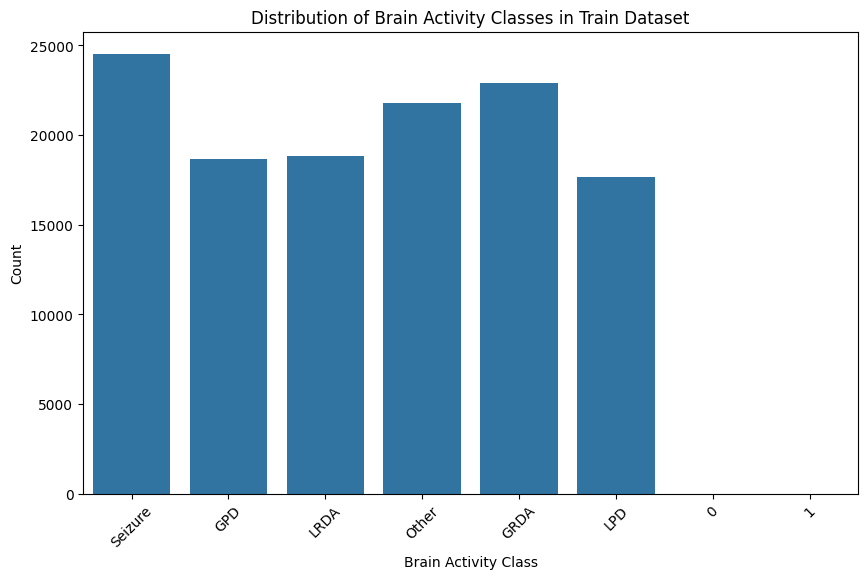

In [8]:
#Label distribution in training dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='expert_consensus')
plt.title('Distribution of Brain Activity Classes in Train Dataset')
plt.xlabel('Brain Activity Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()